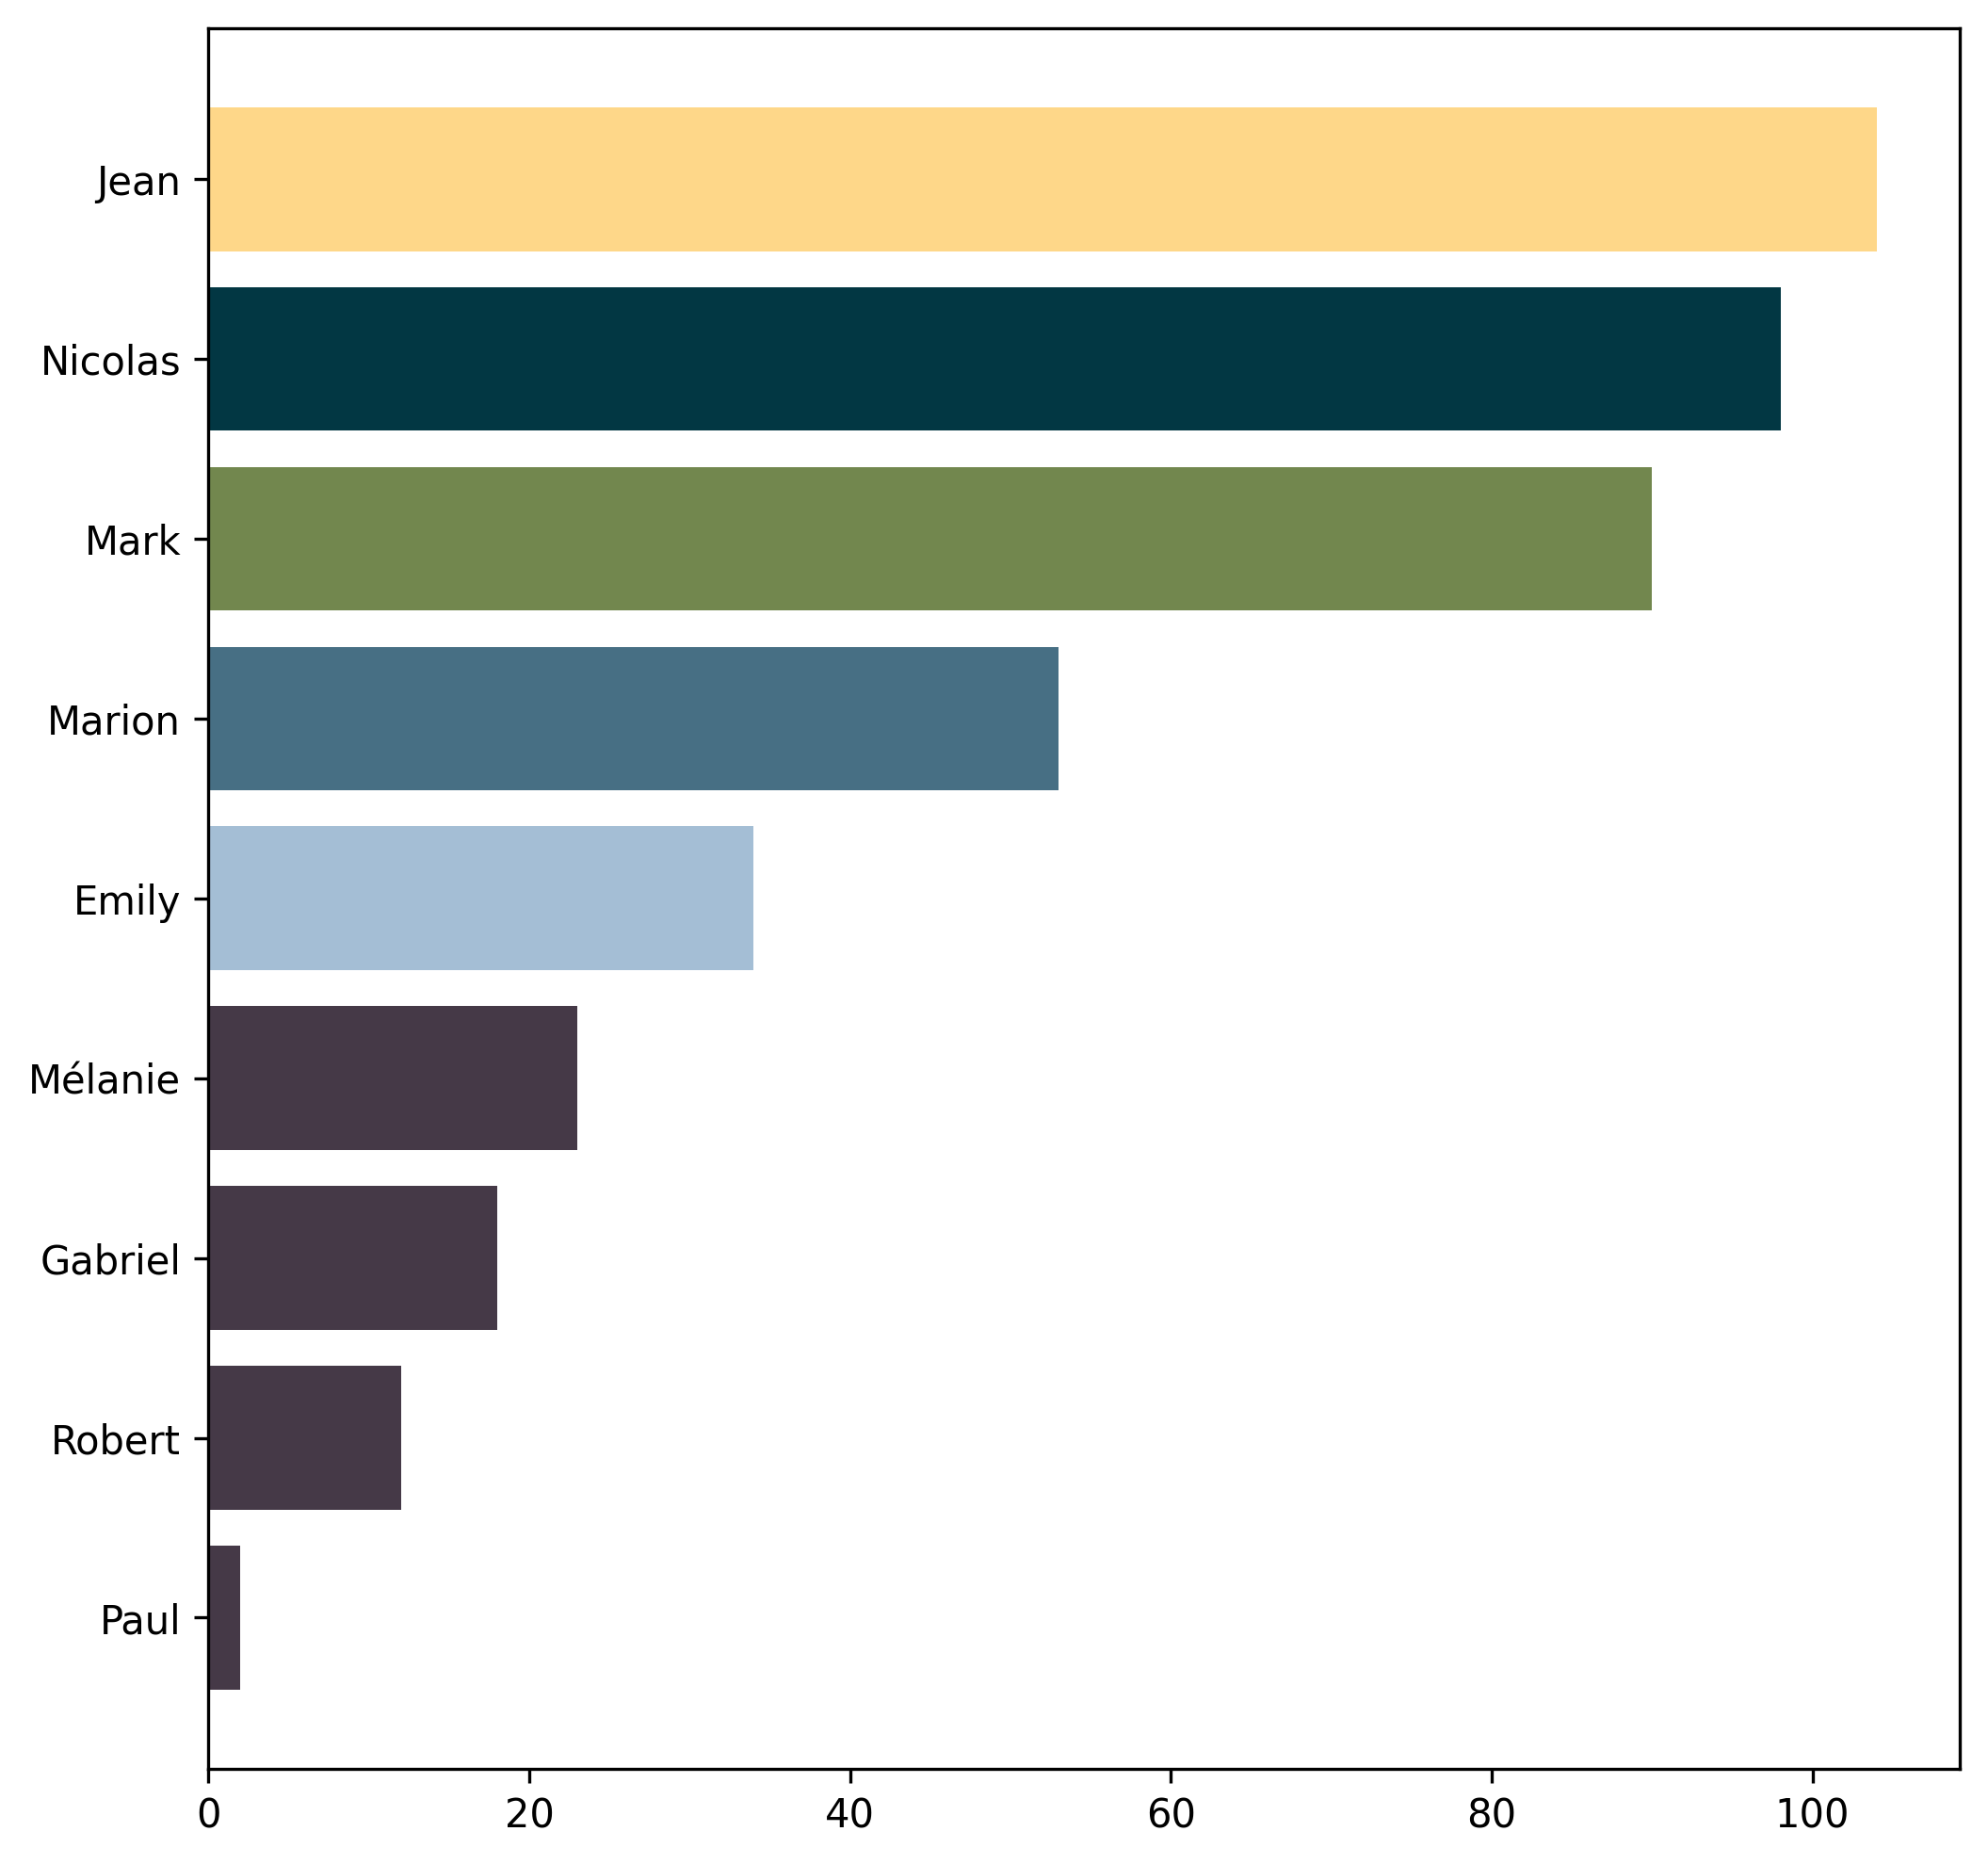

In [2]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap

# create dataset
data = {
    "name": ["Mark", "Robert", "Emily", "Marion", "Nicolas", "Mélanie", "Gabriel", "Jean", "Paul"],
    "value": [90, 12, 34, 53, 98, 23, 18, 104, 2]
}
df = pd.DataFrame(data)
df.sort_values(by="value", inplace=True)

# create a color palette
cmap = load_cmap('Acadia')

# create a bar plot
fig, ax = plt.subplots(figsize=(8,8), dpi=300)
ax.barh(df["name"], df["value"], color=[cmap(i) for i in range(len(df))][::-1])
plt.show()

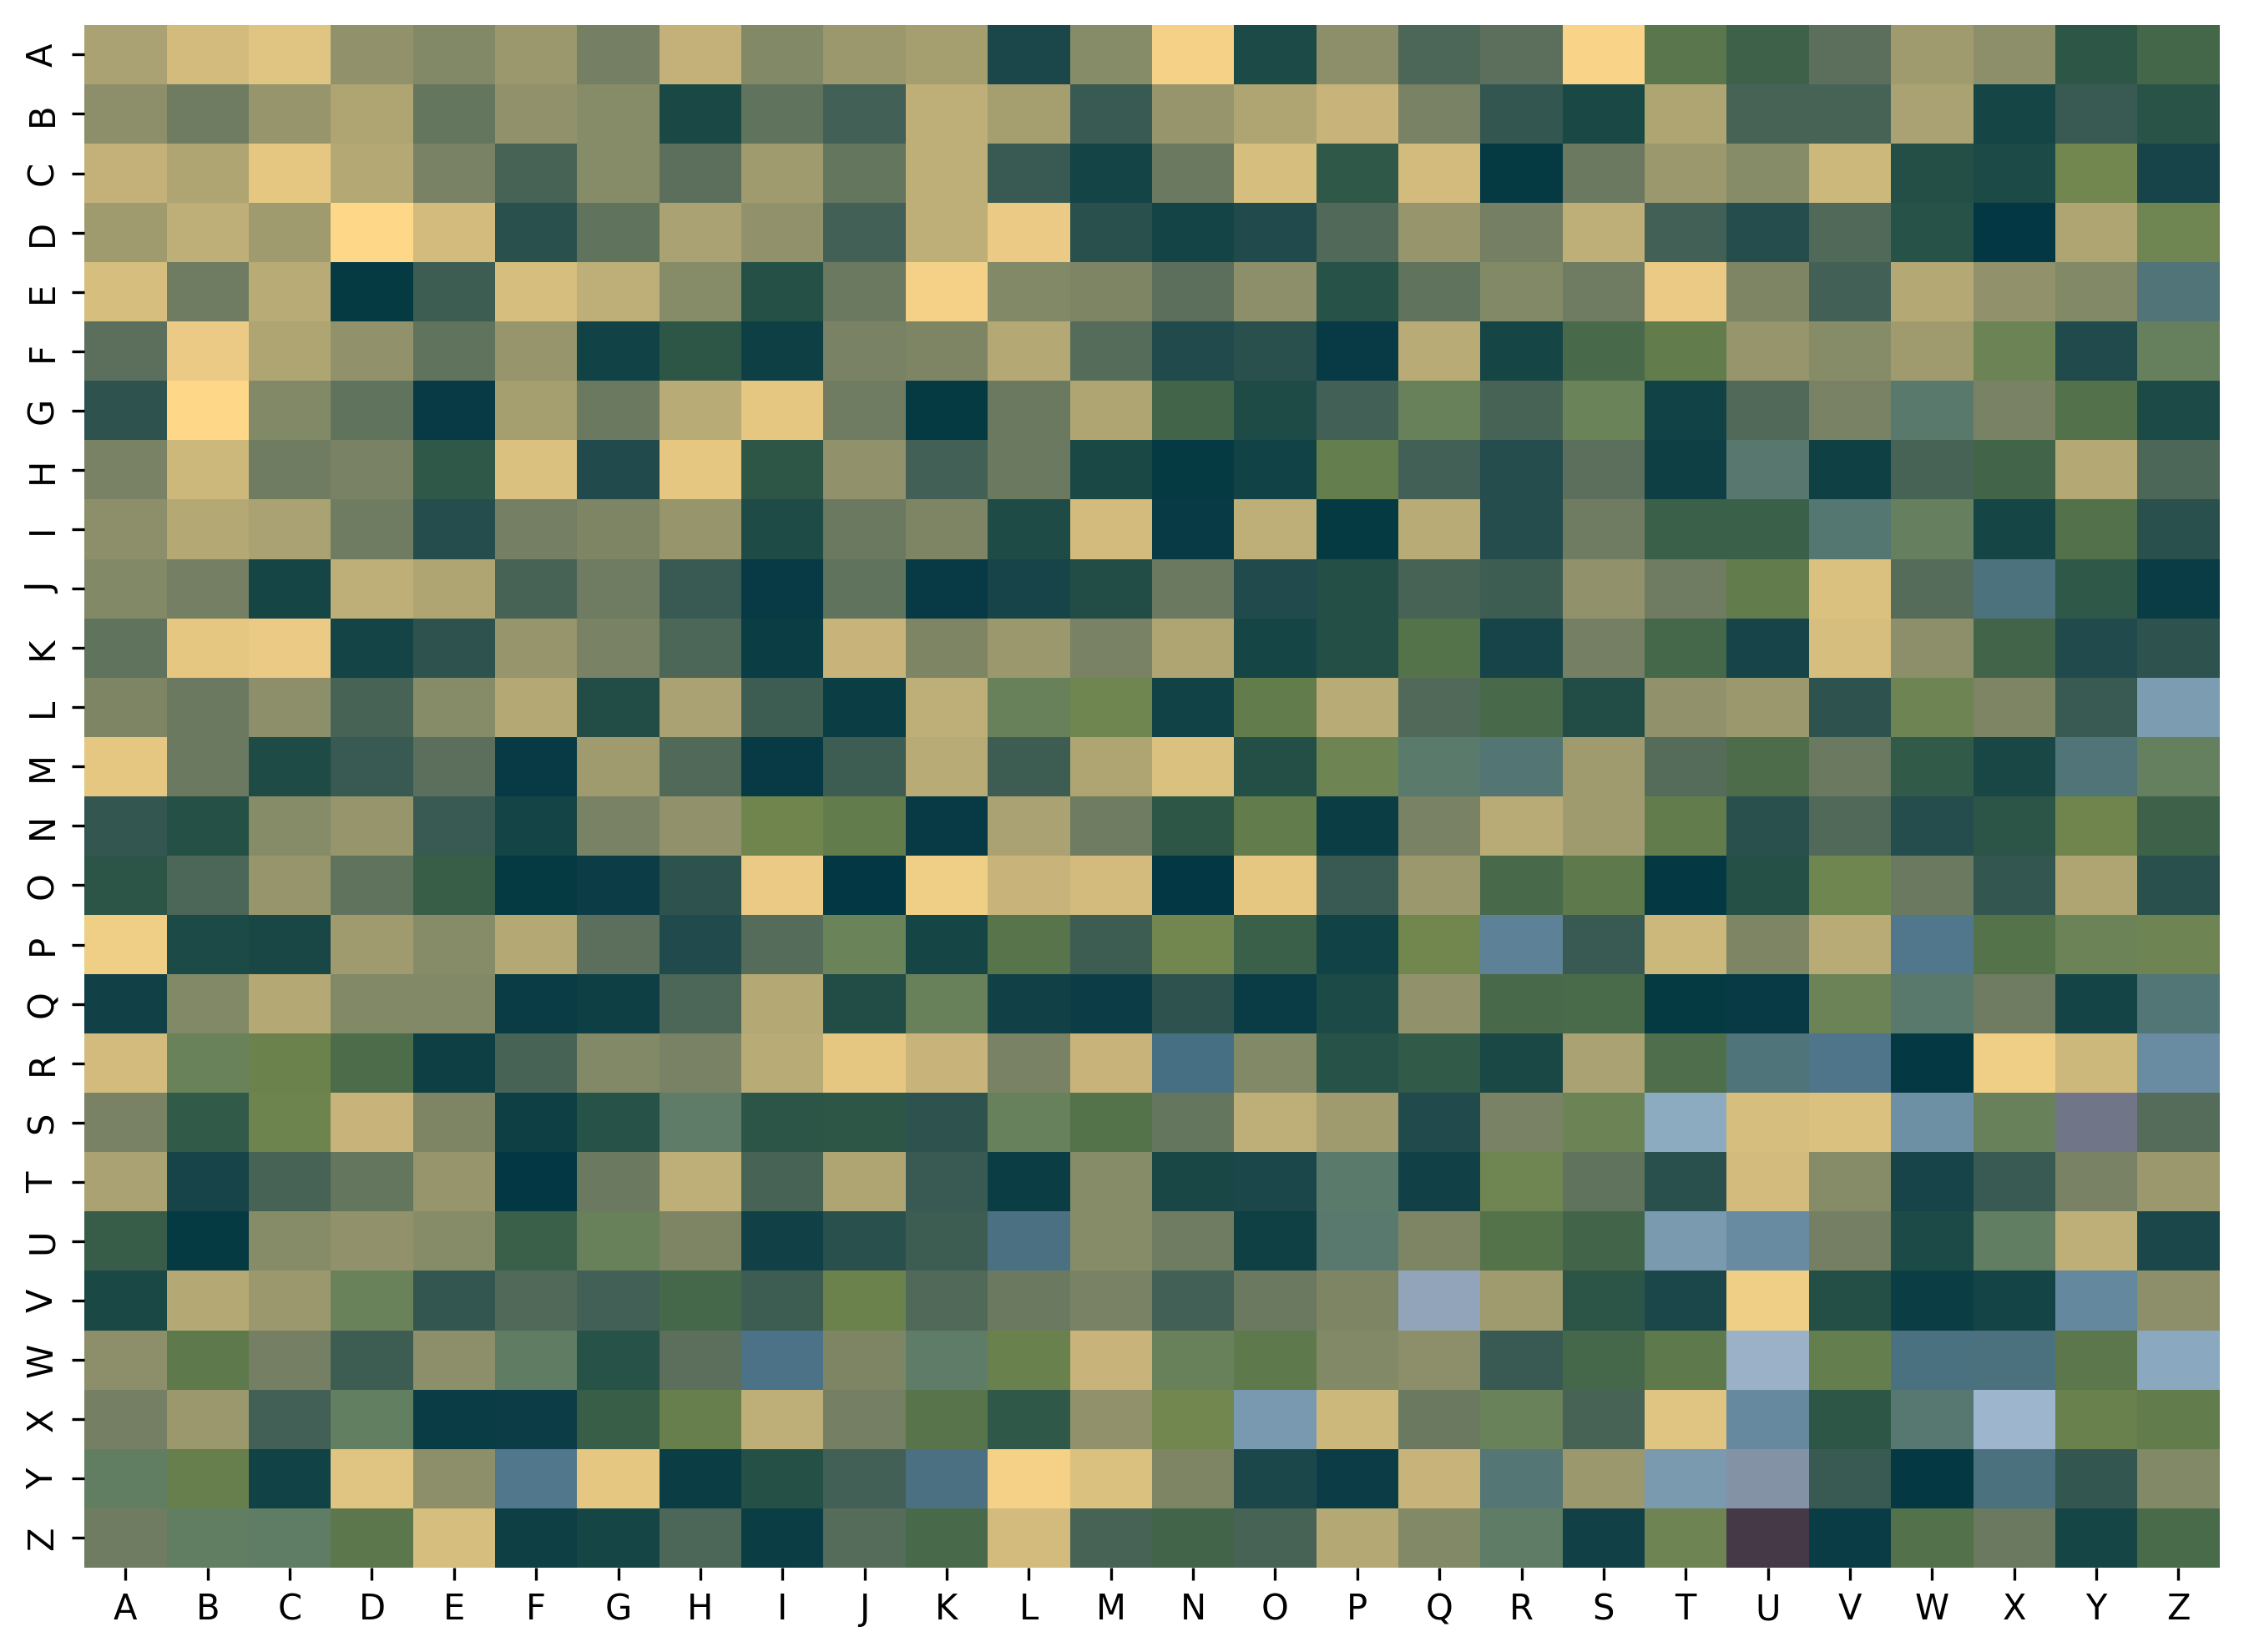

In [5]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypalettes import load_cmap

nCol = 26
nRow = 26

alphabet = [
    "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", 
    "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"
]

def generate_noise_value(x, y):
    scale = 100
    return (np.sin(x / scale) + np.sin(y / scale)) * np.random.random() * np.random.random() + 0.05 * np.random.random()

matrix = np.zeros((nRow, nCol))
for x in range(nCol):
    for y in range(nRow):
        matrix[y, x] = generate_noise_value(x, y)
df = pd.DataFrame(matrix, index=alphabet, columns=alphabet)

# create a color palette
cmap = load_cmap('Acadia', type='continuous')

# create a bar plot
fig, ax = plt.subplots(figsize=(11,8), dpi=300)
sns.heatmap(df, cmap=cmap, ax=ax, cbar=False)
plt.show()

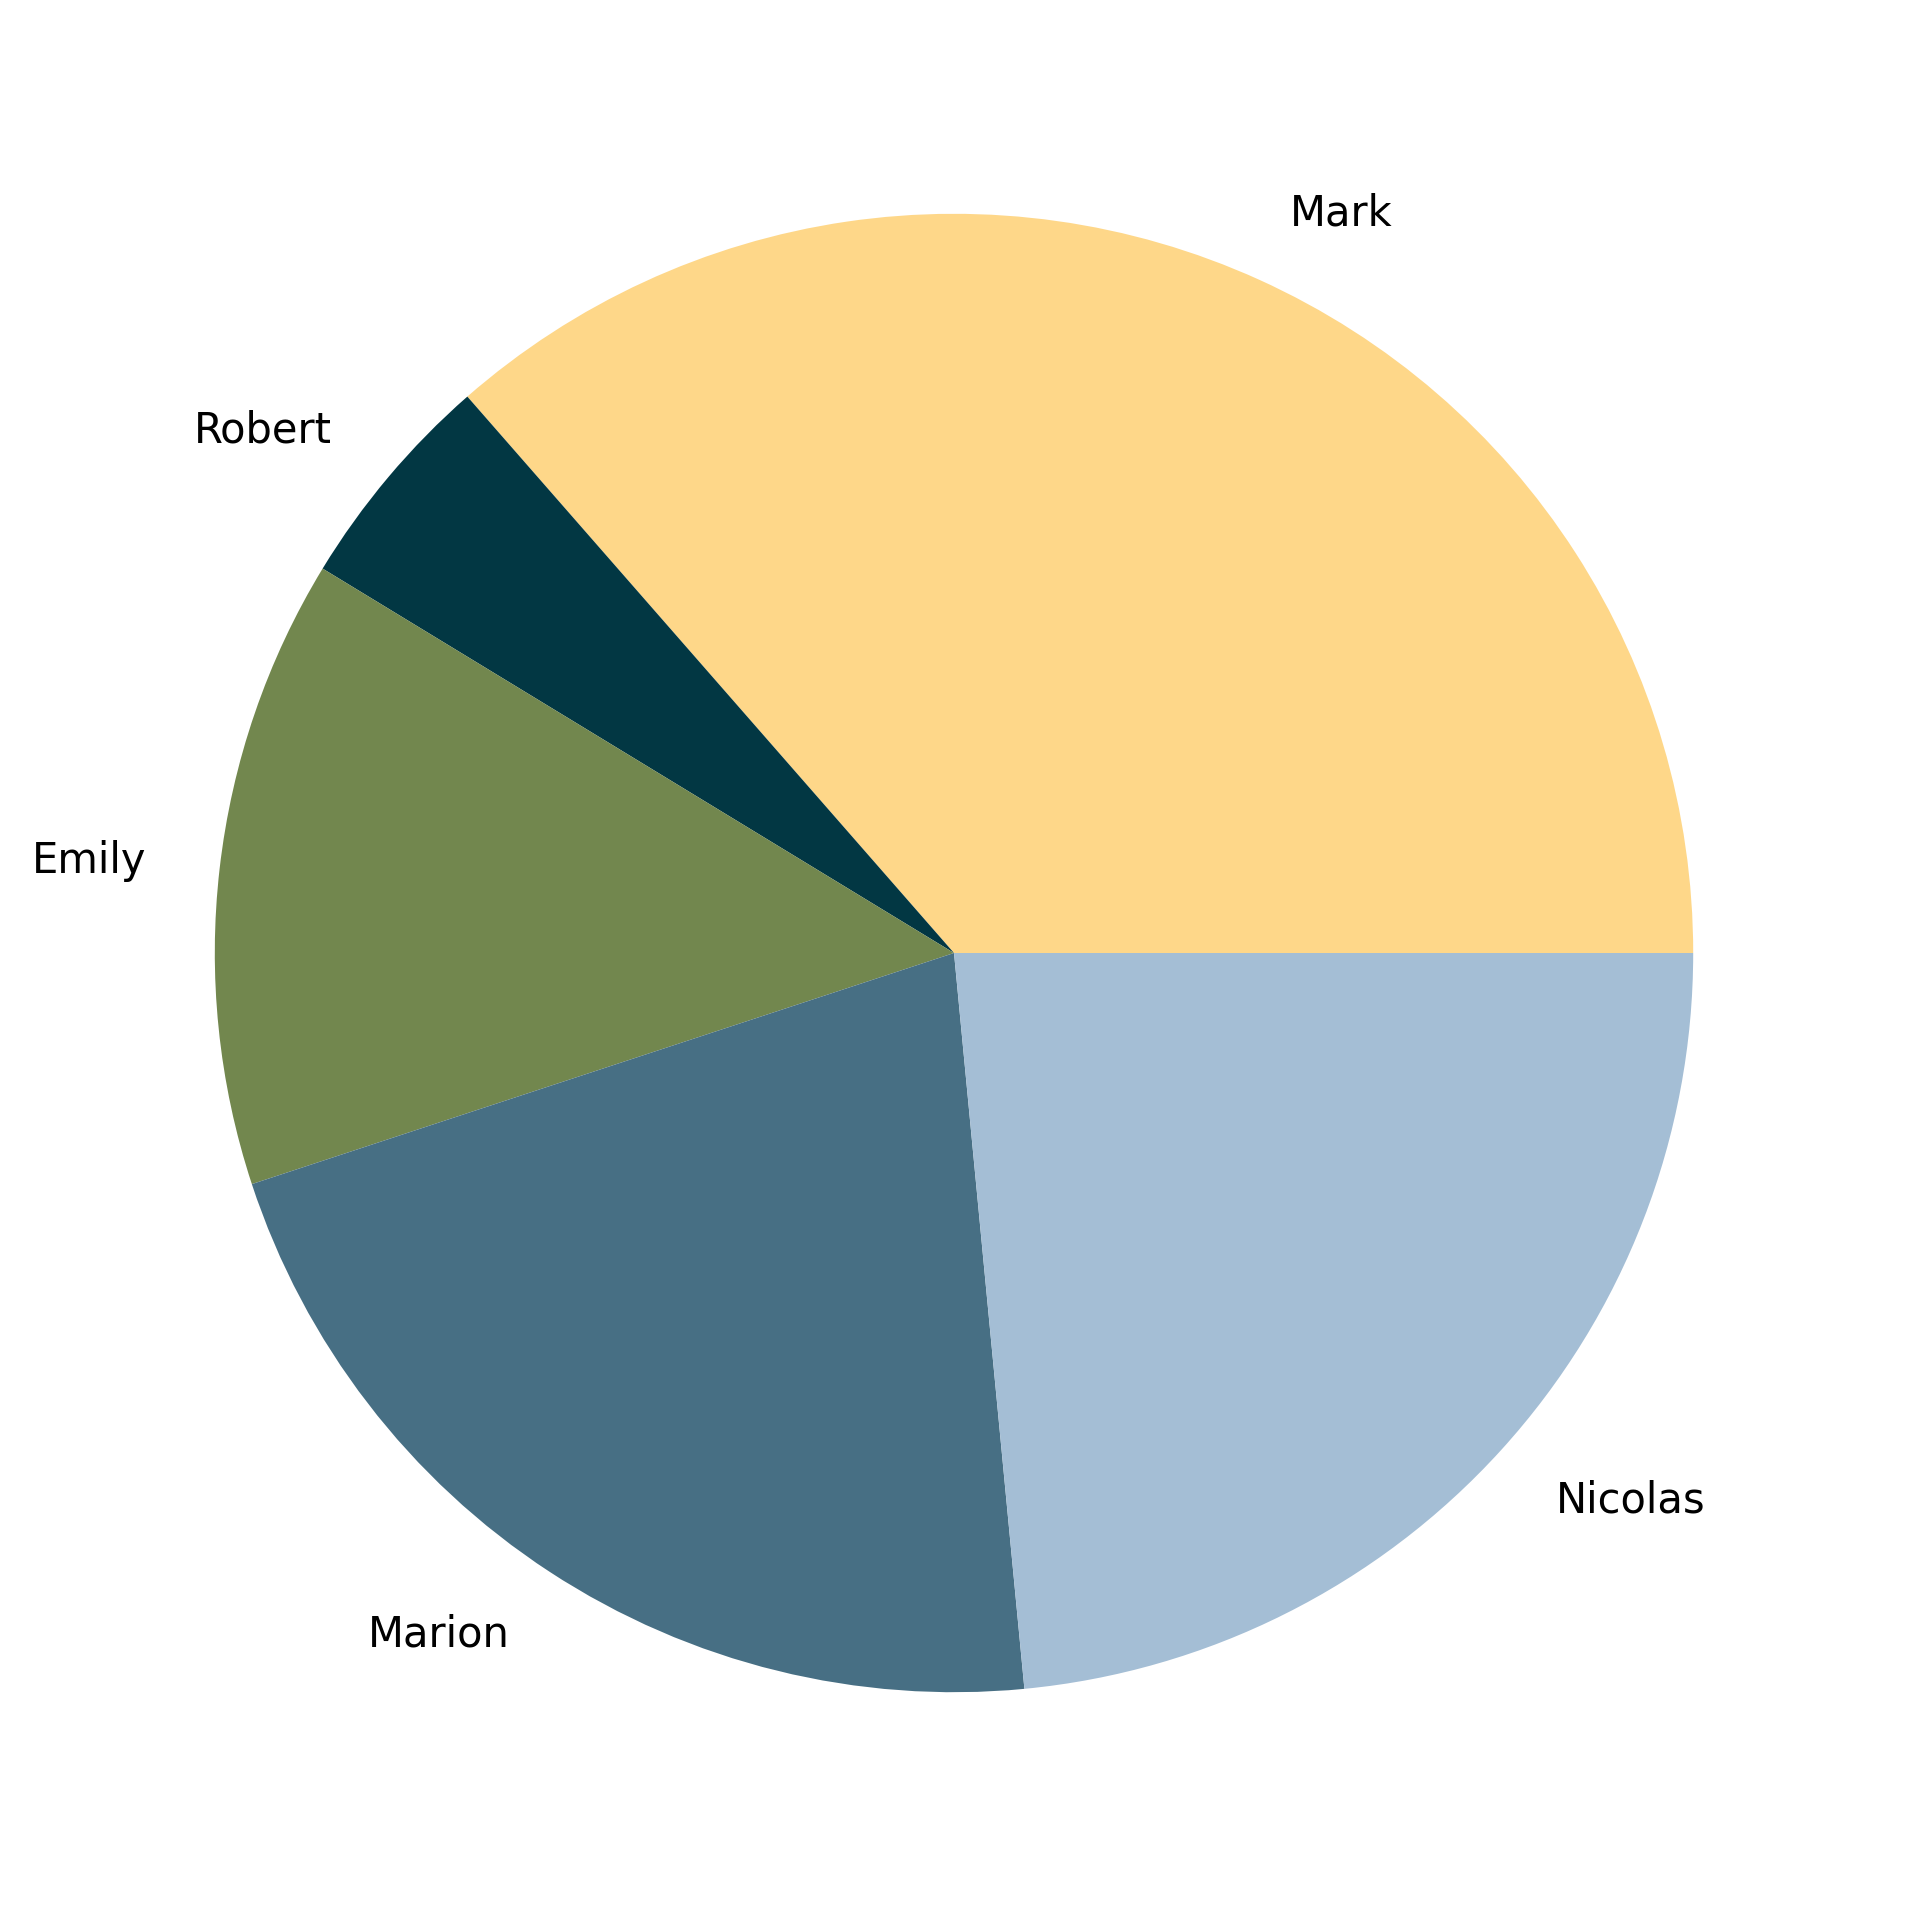

In [8]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap

df = pd.DataFrame({
    "name": ["Mark", "Robert", "Emily", "Marion", "Nicolas"],
    "value": [90, 12, 34, 53, 58]
})

# create a color palette
cmap = load_cmap('Acadia')

# create a bar plot
fig, ax = plt.subplots(figsize=(11,8), dpi=300)
ax.pie(df["value"], labels=df["name"], colors=[cmap(i) for i in range(len(df))])
plt.show()

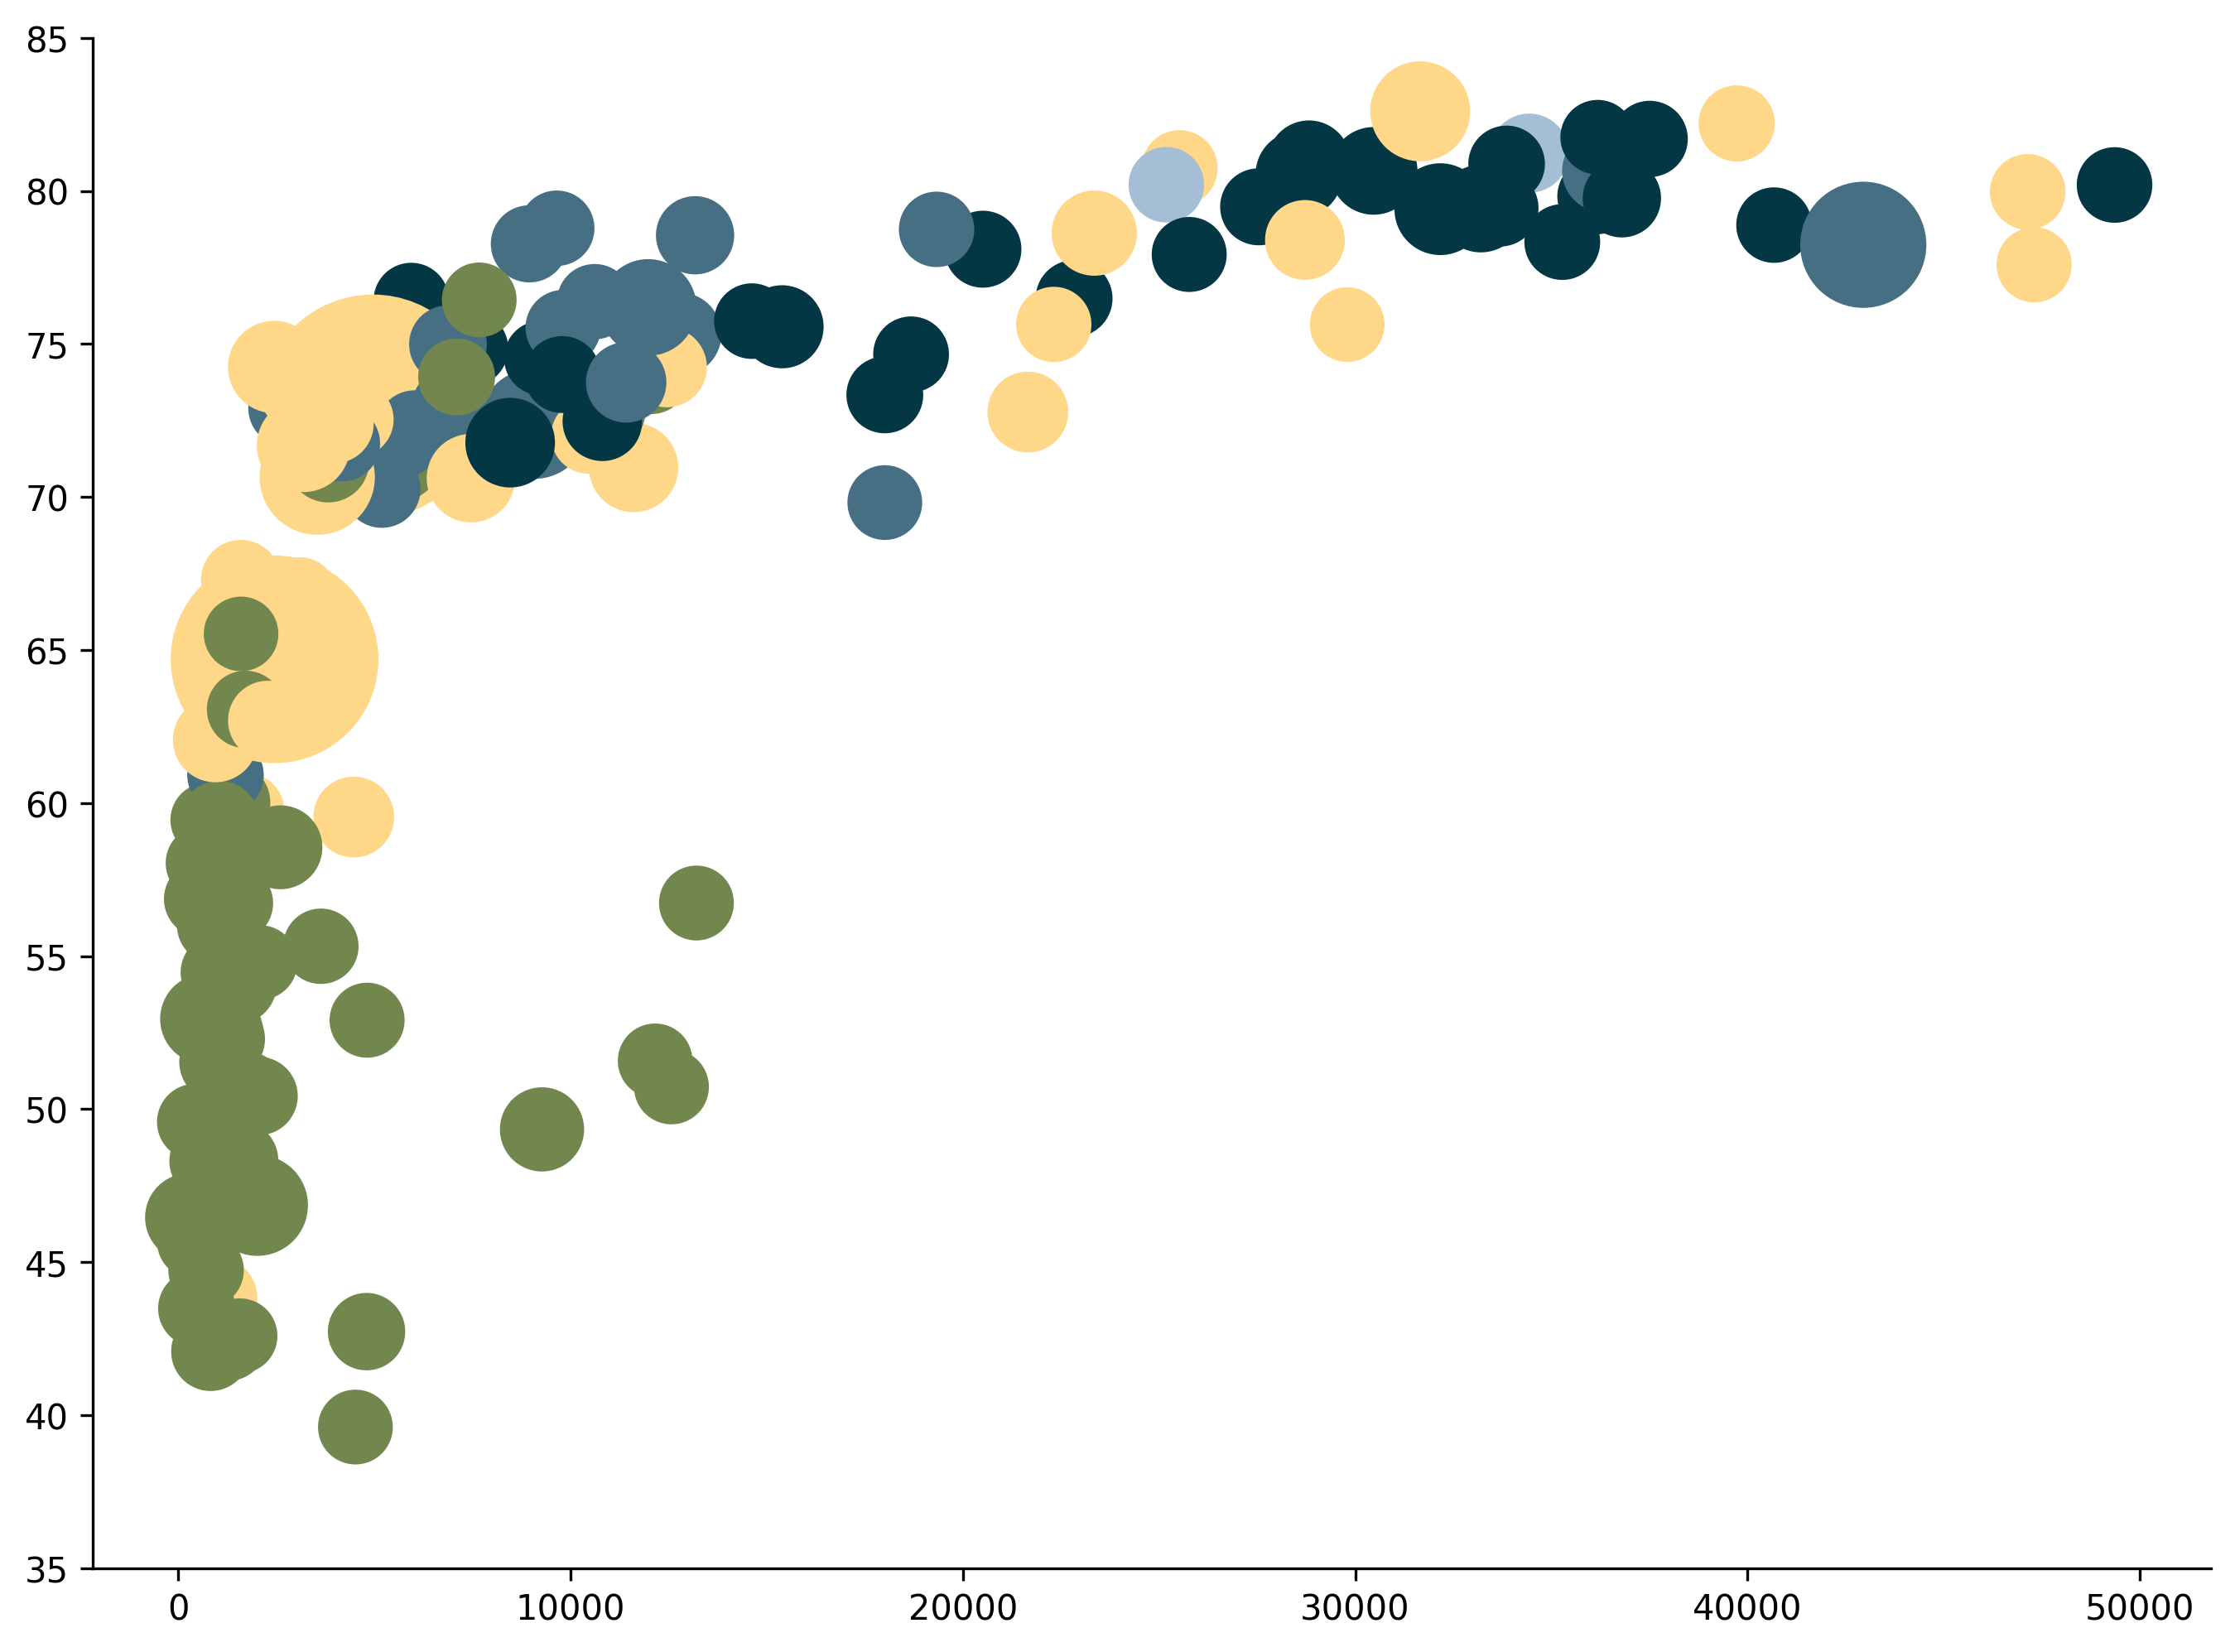

In [36]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
import seaborn as sns

# Load the gapminder dataset
gapminder = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/gapminderData.csv')
df = gapminder.loc[gapminder.year == 2007]

# Create a color palette
cmap = load_cmap('Acadia')
unique_hues = df['continent'].unique()
palette = [cmap(i / len(unique_hues)) for i in range(len(unique_hues))]

# Create a bar plot
fig, ax = plt.subplots(figsize=(11, 8), dpi=300)
ax.spines[['top', 'right']].set_visible(False)
sns.scatterplot(
   data=df,
   x="gdpPercap",
   y="lifeExp",
   size="pop",
   hue="continent",
   edgecolor=None,
   palette=palette,
   sizes=(400, 4000),
   legend=False,
   ax=ax
)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks([i for i in range(35, 90, 5)])
ax.set_yticklabels([str(i) for i in range(35, 90, 5)])
ax.set_xticks([i for i in range(0, 60000, 10000)])
ax.set_xticklabels([str(i) for i in range(0, 60000, 10000)])
plt.show()


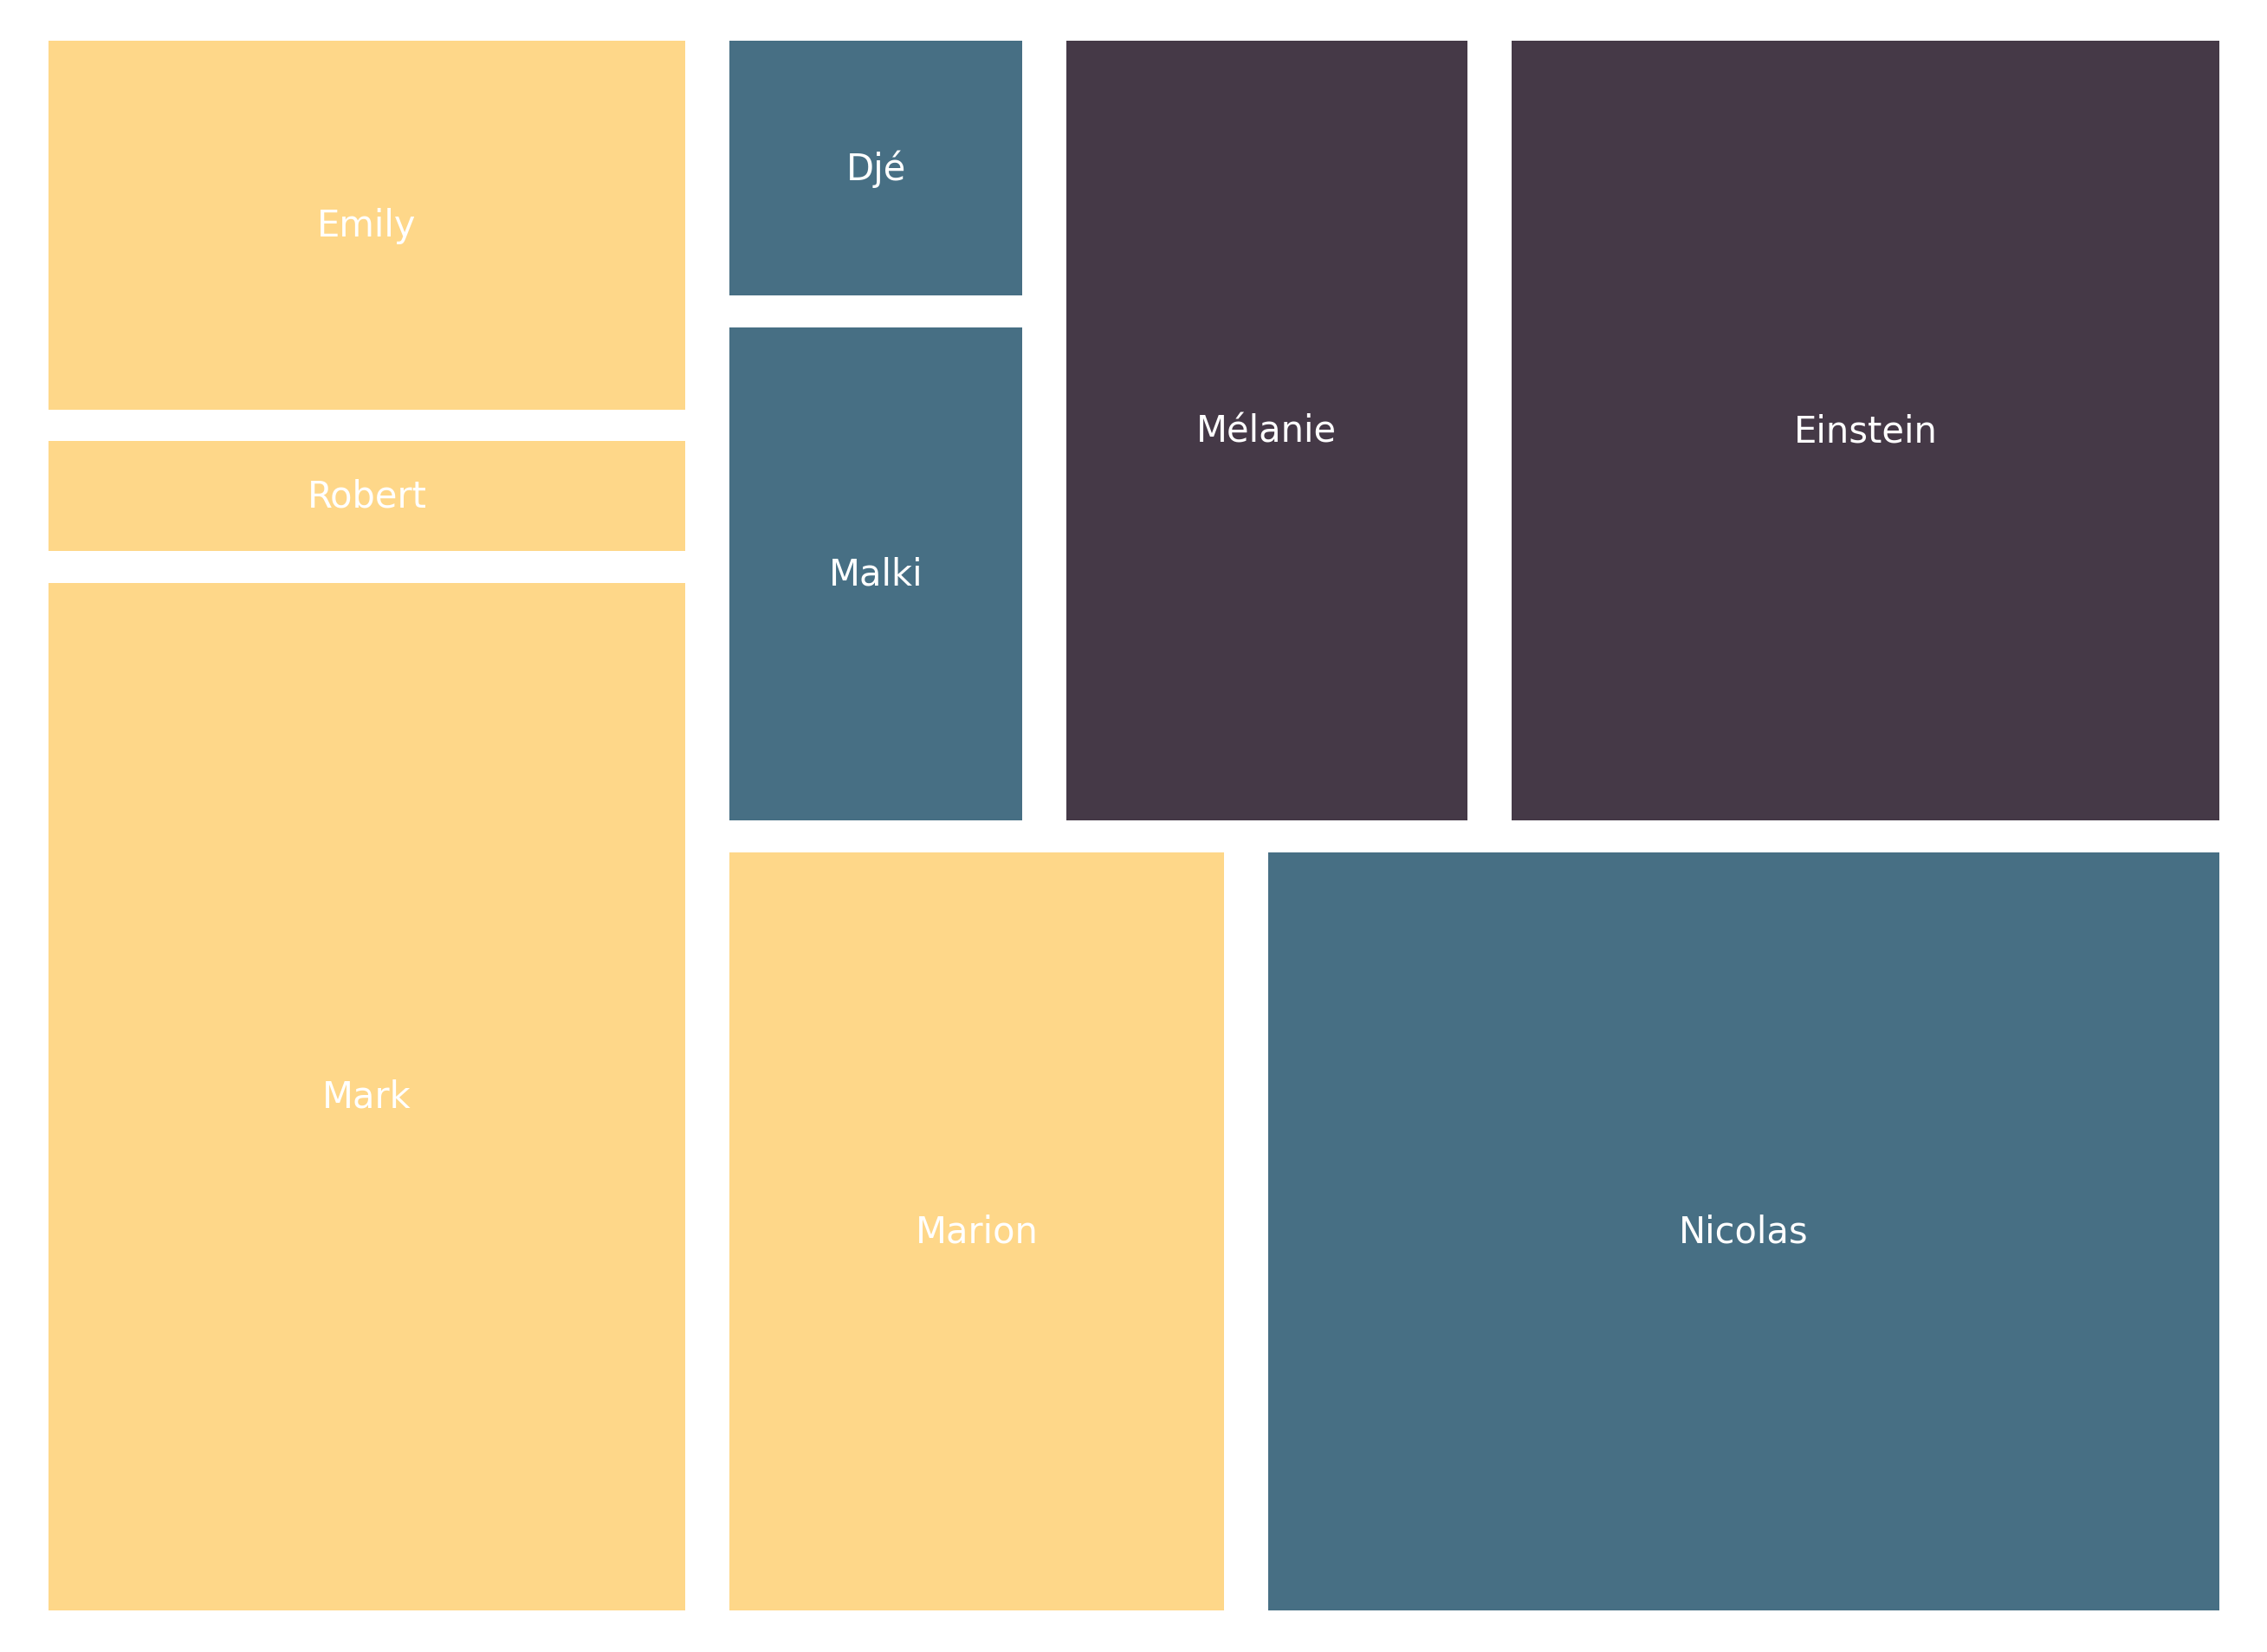

In [58]:
treemap_data = {
    "type": "node",
    "name": "boss",
    "value": 0,
    "children": [
        {
            "type": "node",
            "name": "Team Dataviz",
            "value": 0,
            "children": [
                {"type": "leaf", "name": "Mark", "value": 90},
                {"type": "leaf", "name": "Robert", "value": 12},
                {"type": "leaf", "name": "Emily", "value": 34},
                {"type": "leaf", "name": "Marion", "value": 53},
            ],
        },
        {
            "type": "node",
            "name": "Team DevOps",
            "value": 0,
            "children": [
                {"type": "leaf", "name": "Nicolas", "value": 98},
                {"type": "leaf", "name": "Malki", "value": 22},
                {"type": "leaf", "name": "Djé", "value": 12},
            ],
        },
        {
            "type": "node",
            "name": "Team Sales",
            "value": 0,
            "children": [
                {"type": "leaf", "name": "Mélanie", "value": 45},
                {"type": "leaf", "name": "Einstein", "value": 76},
            ],
        },
    ],
}

# Flattening the tree structure into a DataFrame
def flatten_tree(tree, parent_name=""):
    flattened_data = []
    if tree["type"] == "leaf":
        flattened_data.append({
            "type": tree["type"],
            "name": tree["name"],
            "value": tree["value"],
            "parent": parent_name
        })
    else:
        for child in tree["children"]:
            flattened_data.extend(flatten_tree(child, parent_name=tree["name"]))
    return flattened_data
df = pd.DataFrame(flatten_tree(treemap_data))

# load libraries
import squarify # pip install squarify (algorithm for treemap)
import matplotlib.pyplot as plt
from pypalettes import load_cmap

# create a color palette
cmap = load_cmap('Acadia')
category_codes, unique_categories = pd.factorize(df['parent'])
colors = [cmap(code / (len(unique_categories) - 1)) for code in category_codes]

# create a bar plot
fig, ax = plt.subplots(figsize=(11,8), dpi=300)
ax.set_axis_off()
squarify.plot(
   sizes=df["value"],
   label=df["name"],
   color=colors,
   text_kwargs={'color':'white'},
   pad=True,
   ax=ax
)
plt.show()

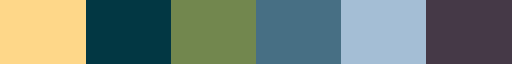

In [54]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap

df = pd.DataFrame({
    "name": ["Mark", "Robert", "Emily", "Marion", "Nicolas"],
    "value": [90, 12, 34, 53, 58]
})

# create a color palette
cmap = load_cmap('Acadia')

# create a bar plot
fig, ax = plt.subplots(figsize=(11,8), dpi=300)
ax.pie(df["value"], labels=df["name"], colors=[cmap(i) for i in range(len(df))])
plt.show()

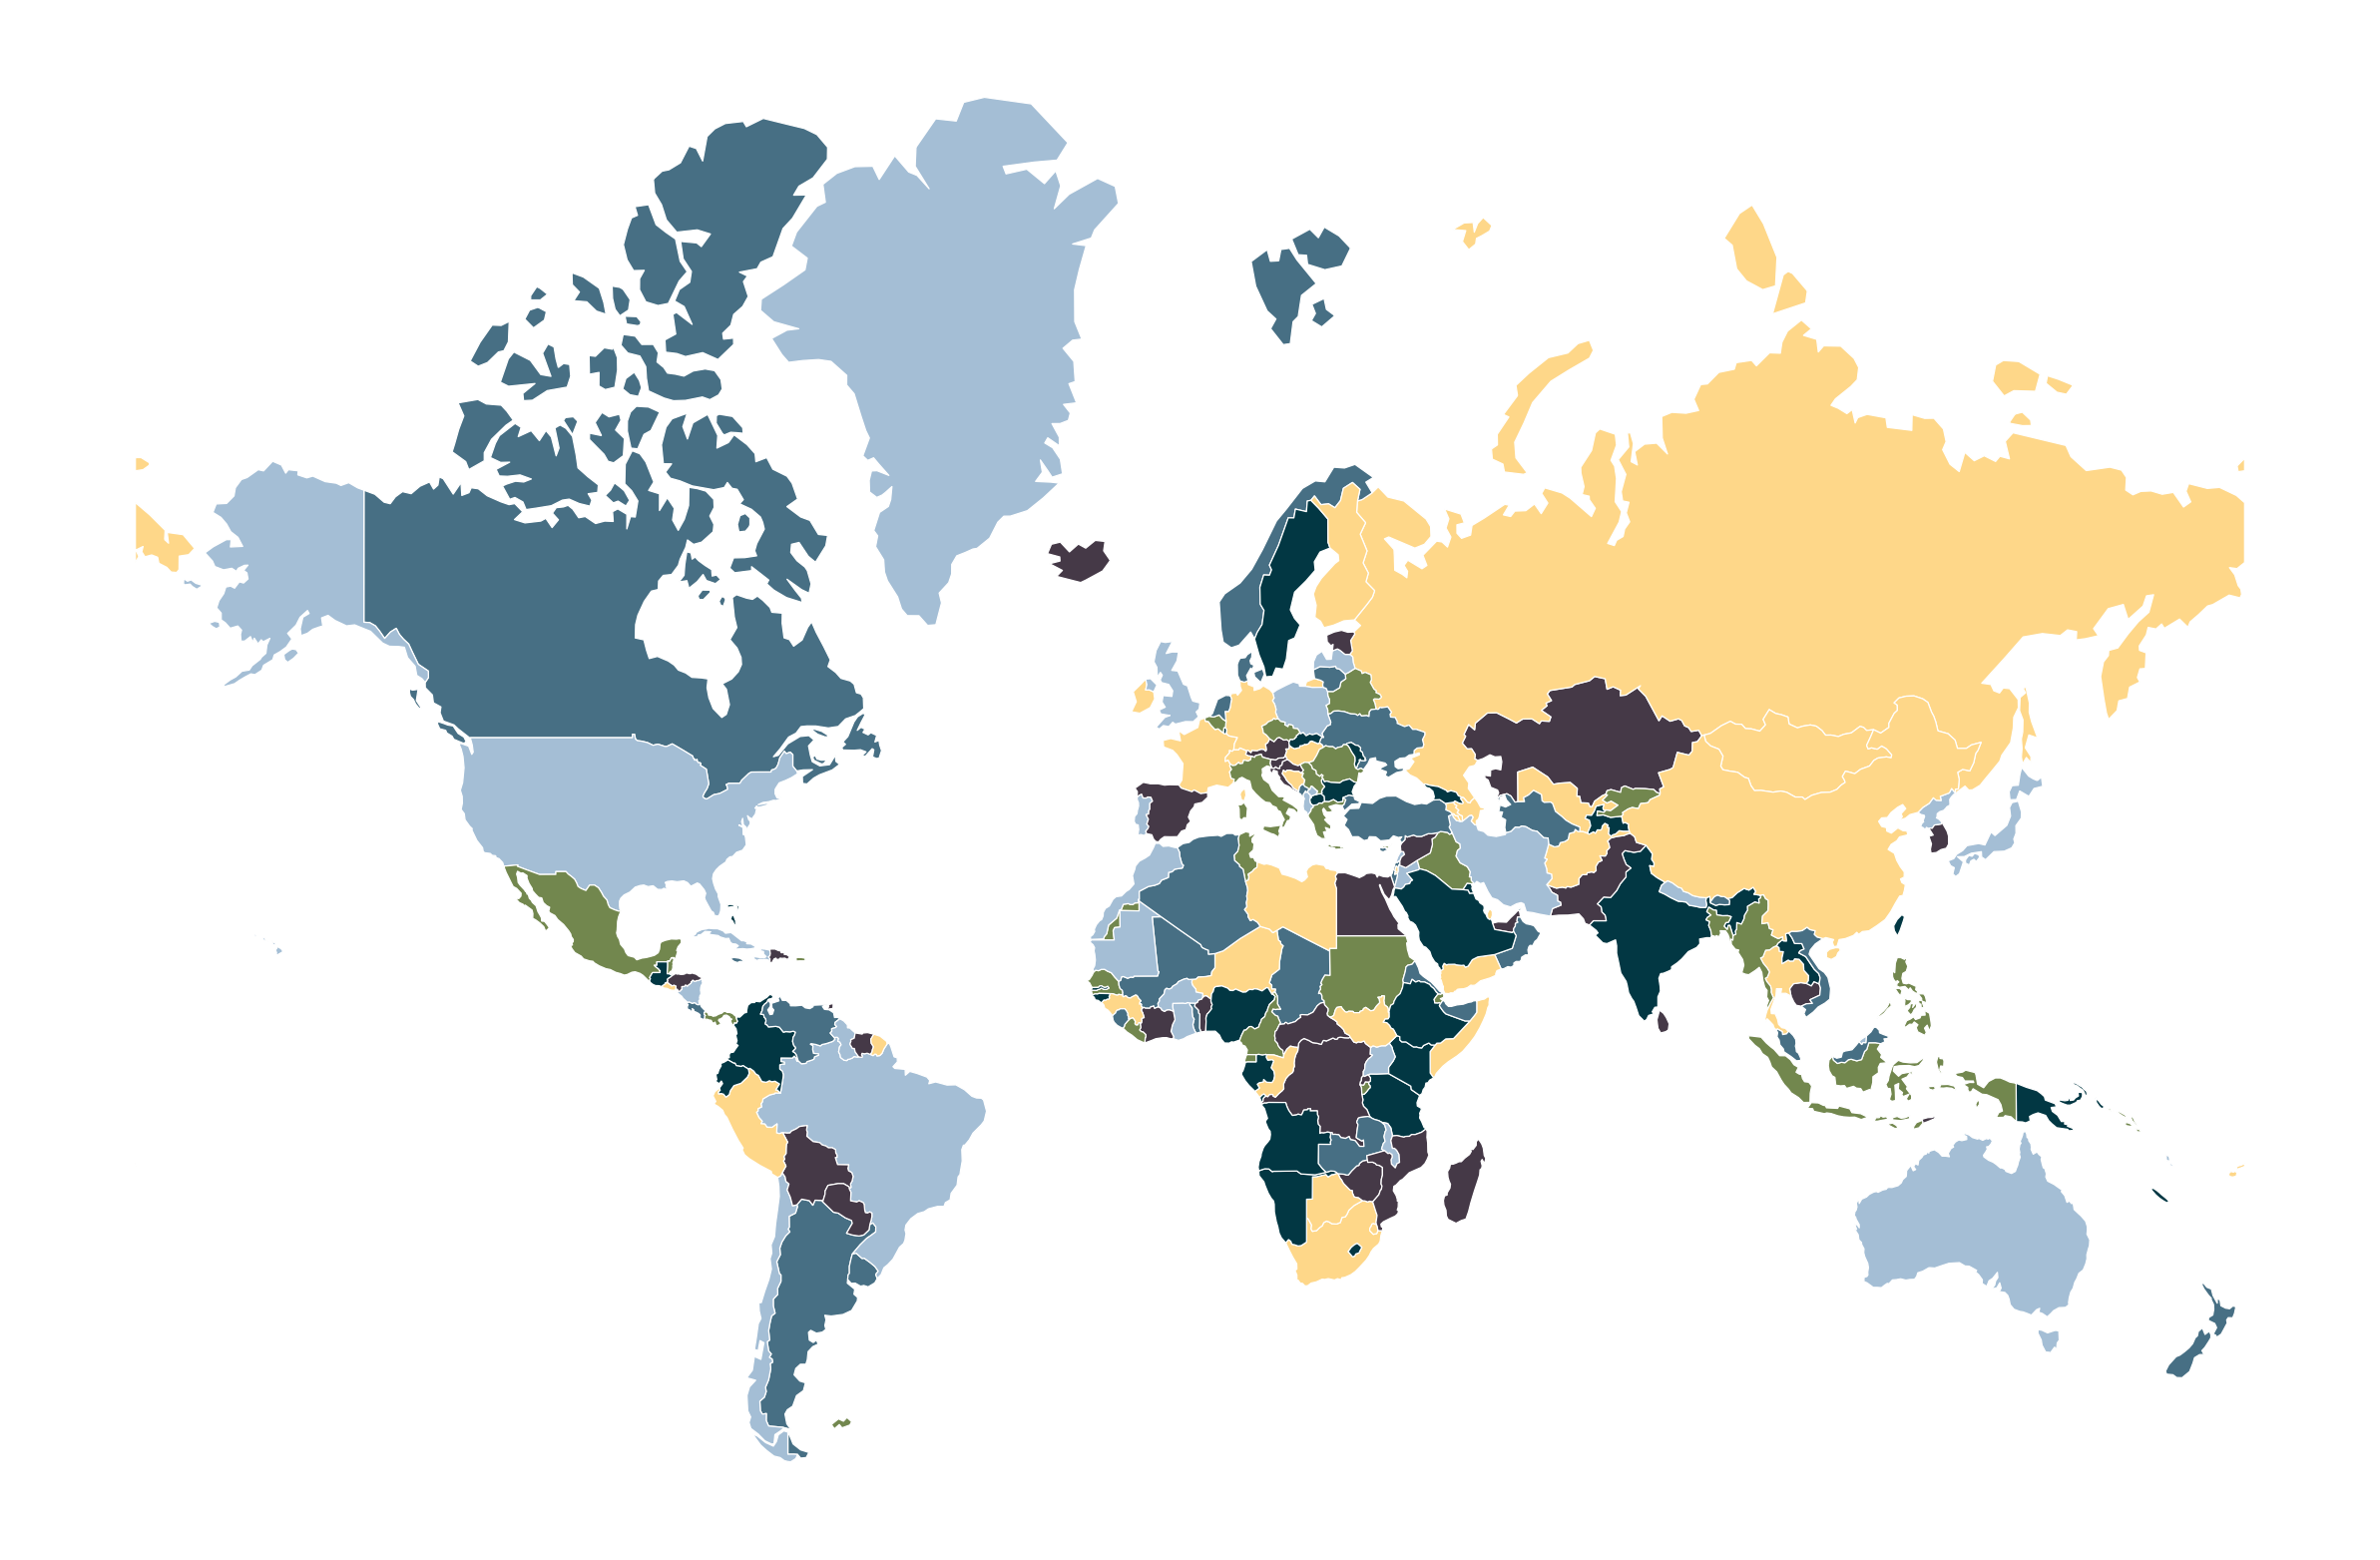

In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
import warnings
warnings.filterwarnings('ignore')

data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data = data[['name', 'geometry']]
data.to_file('data.geojson', driver='GeoJSON')
data = data[~data['name'].isin(['Fr. S. Antarctic Lands', 'Antarctica'])]
data = data.to_crs(epsg=3857)

# create a color palette
cmap = load_cmap('Acadia')

fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
ax.set_axis_off()
data.plot(ax=ax, cmap=cmap, edgecolor='white', linewidth=0.3)
plt.show()